<span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Plotly Tutorial 📊📈</span>

- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Libraries and Utilities</span>](#1)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Load and Check Data</span>](#2)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Scatter Plots</span>](#3)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Bubble Charts</span>](#4)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">3D Scatter Plots</span>](#5)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Line Charts</span>](#6)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Bar Charts</span>](#7)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Pie Charts</span>](#8)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Histograms</span>](#9)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Distplots</span>](#10)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Heatmaps</span>](#11)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Box Plots</span>](#12)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Subplots</span>](#13)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#3F5075; ">What is Plotly?</span>

Plotly is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.



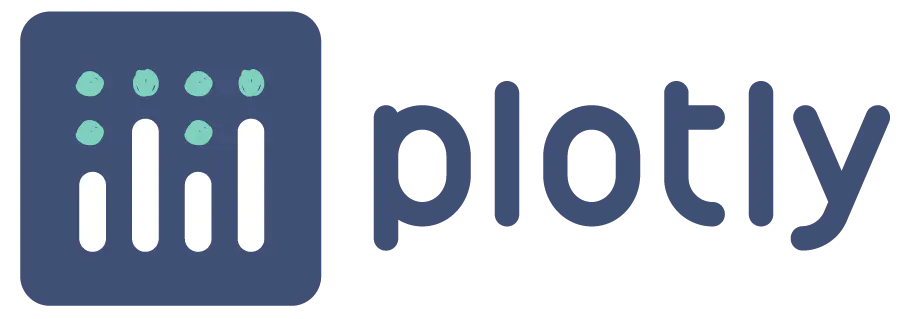

<a id = "1"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Libraries and Utilities</span></h1>

We need to install plotly first.

In [1]:
!pip install plotly

In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, time, datetime
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv
/kaggle/input/autompg-dataset/auto-mpg.csv


<a id = "2"></a><h1 id="Load and Check Data"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Load and Check Data</span></h1>

This dataset consists of the marks secured by the students in various subjects.

In [3]:
file_path = '/kaggle/input/students-performance-in-exams/StudentsPerformance.csv'

df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<a id = "3"></a><h1 id="Scatter Plots"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Scatter Plots</span></h1>

- Scatter plots allow the comparison of two variables for a set of data.
- Depending on the trend of scatter points, we could interpret a correlation.
- We can create scatter plots with <code>go.Scatter</code>
- Set the title of graph by using <code>title</code> in **layout**.
- We have to set mode as markers to get scatter, otherwise it come ups with lines.
- The <code>x</code> and <code>y</code> parameters inside the **title** dictionary represent the position of the title.
- We can also specify the size of output with <code>width</code> and <code>height</code>
- We have to put the data and layout parts we filled in into the figure we created with <code>go.Figure</code>

In [4]:
scatter = [go.Scatter(x = df['reading score'],
                      y = df['writing score'],
                      mode ='markers')] 

fig = go.Figure(scatter)

iplot(fig)

In [5]:
data = [go.Scatter(x = df['reading score'],
                   y = df['writing score'],
                   mode = 'markers',
                   marker = dict(size = 12,
                                 color = 'rgb(0, 189, 255)',
                                 symbol = 'diamond',
                                 opacity = 0.75,
                                 line={'color': 'black',
                                       'width': 1.5}))]

layout = go.Layout(title=dict(text='Reading Score & Writing Score',
                              y=0.9,
                              x=0.5,
                              xanchor= 'center',
                              yanchor= 'top'),
                   xaxis={'title':'Reading Score'},
                   yaxis=dict(title = 'Writing Score'),
                   hovermode = 'closest',
                   template = 'plotly_white')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [6]:
trace_male = (go.Scatter(x=df[df['gender']=='male']['math score'],
                         showlegend=True,
                         text='Male',
                         y = df[df['gender']=='male']['writing score'],
                         name='Male',
                         mode='markers',
                         marker = dict(color= 'cornflowerblue',
                                       size = 9,
                                       opacity = 0.55)))

trace_female = (go.Scatter(x=df[df['gender'] == 'female']['math score'],
                           showlegend=True,
                           text='Female',
                           y = df[df['gender'] == 'female']['writing score'],
                           name = 'Female',
                           mode = 'markers',
                           marker = dict(color = 'darkorange',
                                         size = 9,
                                         opacity = 0.55)))
        
data=[trace_male,trace_female]

layout= go.Layout(title = 'Math Score & Writing Score',
                  xaxis = dict(title = 'Math Score'),
                  yaxis = dict(title = 'Writing Score'),
                  width = 700,
                  height = 450,
                  template = 'simple_white')

fig = go.Figure(data=data,layout=layout)   
iplot(fig)

In [7]:
data = [go.Scatter(x = df['reading score'],
                   y = df['writing score'],
                   mode = 'markers',
                   text=df['math score'],
                   marker=dict(size = 14,
                               color = df['math score'],
                               showscale = True,
                               colorscale = 'Cividis',
                               colorbar = dict(title='Math Score'),
                               opacity = 0.6))]

layout = go.Layout(title=dict(text='Reading Score - Writing Score - Math Score',
                              y = 0.9,
                              x = 0.5,
                              xanchor = 'center',
                              yanchor = 'top'),
                   xaxis = dict(title = 'Reading Score'),
                   yaxis =dict(title = 'Writing Score'),
                   template='simple_white')

fig = go.Figure(data=data,layout=layout)
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#3F5075; ">Scatter Plots by Using For Loop</span>

In [8]:
data = []
for i in df['parental level of education'].unique():
    data.append(go.Scatter(x = df[df['parental level of education'] == i]['reading score'],
                           y = df[df['parental level of education'] == i]['math score'],
                           mode = 'markers',
                           name = str(i),
                           showlegend = True,
                           marker = dict(size = 12,
                                          opacity = 0.65)))

layout = go.Layout(title = 'Scores by Level of Education',
                   xaxis = dict(title='Reading Score'),
                   yaxis = dict(title='Math Score'),
                   template = 'plotly_white')

fig = go.Figure(data=data, layout = layout)
iplot(fig)

<a id = "4"></a><h1 id="Bubble Charts"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Bubble Charts</span></h1>

- A bubble chart is a type of chart that displays **three dimensions** of data.
- Bubble charts can be considered a variation of the scatter plot, in which the data points are replaced with bubbles.
- Define the third variable with <code>size</code> in bubble charts.

In [9]:
data = [go.Scatter(x = df['reading score'],
                   y = df['writing score'],
                   mode = 'markers',
                   text = df['math score'],
                   marker = dict(size = df['math score'] * 0.5,
                                 color = '#FFAE00',
                                 showscale = False,
                                 opacity = 0.5,
                                 line = dict(color = 'black', 
                                             width = 0.5)))]

layout = go.Layout(title=dict(text = 'Reading Score - Writing Score - Math Score',
                              y = 0.9,
                              x = 0.5,
                              xanchor = 'center',
                              yanchor = 'top'),
                   xaxis = dict(title = 'Reading Score'),
                   yaxis = dict(title = 'Writing Score'),
                   template ='plotly_white')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id = "5"></a><h1 id="3D Scatter Plots"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">3D Scatter Plots</span></h1>

In [10]:
auto_mpg = pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv', na_values = '?')

auto_mpg = auto_mpg.dropna()

data = go.Scatter3d(x = auto_mpg['horsepower'],
                    y = auto_mpg['mpg'],
                    z = auto_mpg['displacement'],
                    mode = 'markers',
                    marker = dict(color = auto_mpg['weight'],
                                  showscale = True,
                                  colorbar = dict(title = 'Weight'),
                                  colorscale = 'brwnyl',
                                  opacity = 0.7))

layout = go.Layout(title = dict(text='Horsepower - MPG - Displacement - Weight',
                                y = 0.9,
                                x = 0.5,
                                xanchor = 'center',
                                yanchor = 'top'),
                   scene = dict(xaxis = dict(title = 'Horsepower'),
                                yaxis = dict(title = 'MPG'),
                                zaxis = dict(title = 'Displacement')),
                   font = dict(size = 12),
                   template = 'plotly_white')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id = "6"></a><h1 id="Line Charts"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Line Charts</span></h1>

- A line chart displays a series of data points (markers) connected by line segments.
- It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.
- Often used to visualize a trend in data over intervals of time - known as a time series.
- To create a line chart, tune the <code>mode</code> parameter as "line".
- Like scatter plots, you can edit marker qualities like line color,line width, etc. in <code>line</code> parameter.

In [11]:
students_df = pd.DataFrame({'date': [date(year = 2020 + i, month = 1, day = 1) for i in range(10)],
                            'students': np.random.randint(25,60,10),
                            'lecturers': np.random.randint(10, 20, 10)})

students_df.head()

,date,students,lecturers
0,2020-01-01,37,14
1,2021-01-01,38,11
2,2022-01-01,49,17
3,2023-01-01,34,16
4,2024-01-01,39,17


In [12]:
line = [go.Scatter(x = students_df['date'],
                   y = students_df['students'],
                   mode = 'lines')] 

fig = go.Figure(data = line)
iplot(fig)

In [13]:
data = go.Scatter(x = students_df['date'],
                  y = students_df['students'],
                  mode = 'lines',
                  name = 'students')

layout = go.Layout(title={'text': "Number of Students by Years",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Student'),
                   template = 'plotly_white')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [14]:
student = go.Scatter(x = students_df['date'],
                     y = students_df['students'],
                     mode = 'lines',
                     name = 'students',
                     marker = dict(color = 'darkorange'))

lecturer = go.Scatter(x = students_df['date'],
                     y = students_df['lecturers'],
                     mode = 'lines',
                     name = 'lecturers',
                     marker = dict(color = 'royalblue'))


layout = go.Layout(title={'text': "Number of Students & Lecturers by Years",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title = 'Year'),
                   template = 'plotly_dark')

fig = go.Figure(data = [student, lecturer], layout = layout)
iplot(fig)

In [15]:
fig = make_subplots(rows = 1,
                    cols = 2,
                    shared_yaxes = True,
                    subplot_titles = ("2020-2024", "2025-2029"))

fig.add_trace(go.Scatter(x = students_df['date'][0:5],
                         y = students_df['students'][0:5],
                         mode = 'lines',
                         showlegend = False,
                         name = 'students20-24',
                         line = dict(color = '#18FF01',
                                     width = 3,
                                     dash = 'dashdot')),
              row = 1, col = 1)
                                      
fig.add_trace(go.Scatter(x = students_df['date'][5:10],
                         y = students_df['students'][5:10],
                         mode = 'lines',
                         showlegend = False,
                         name = 'students25-29',
                         line = dict(color = '#01AAFF',
                                     width = 3,
                                     dash = 'dash')),
              row = 1, col = 2)

fig.update_yaxes(title_text = "Students", row = 1, col = 1)
fig.update_yaxes(title_text = "Students", row = 1, col = 2)

fig.update_layout(title=dict(text ='Number of Students by Years',
                             y = 0.9,
                             x = 0.5,
                             xanchor = 'center',
                             yanchor = 'top'),
                  template = 'simple_white')

iplot(fig)

<a id = "7"></a><h1 id="Bar Charts"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Bar Charts</span></h1>
- A bar chart presents **categorical data** with rectangular bars with heights (or lengths) proportional to the values that they represent.
- Built a bar chart with <code>go.Bar</code>
- Use <code>text</code> to display values on each bar.
- Bars can be edited with <code>marker</code>

In [16]:
bar = go.Figure(go.Bar(x = df.groupby('gender').agg({'reading score':'mean'}). \
                       reset_index()['gender'],
                       y = df.groupby('gender').agg({'reading score':'mean'}). \
                       reset_index()['reading score']))
iplot(bar)

In [17]:
data = go.Bar(x = df.groupby('gender').agg({'math score':'mean'}). \
              reset_index()['gender'],
              y = df.groupby('gender').agg({'math score':'mean'}). \
              reset_index()['math score'],
              width = [0.7, 0.7],
              marker = dict(color = 'cornflowerblue',
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2))

layout = go.Layout(title='Avg Math Scores by Gender',
                   xaxis = dict(title='Gender'),
                   yaxis =dict(title='Math Score'),
                   width = 700,
                   height = 700,
                   template = 'plotly_white')

fig=go.Figure(data = data,
              layout = layout)
fig.update_yaxes(range = [0, 100])
iplot(fig)

In [18]:
data = go.Bar(x = df.groupby('gender').agg({'reading score':'mean'}). \
              reset_index()['gender'],
              y = df.groupby('gender').agg({'reading score':'mean'}). \
              reset_index()['reading score'],
              width=[0.5, 0.5],
              text =round(df.groupby('gender').agg({'reading score':'mean'}).reset_index()['reading score'],2),
              textposition= 'outside',
              textfont = dict(size = 26,
                             color = 'deeppink'),
              marker = dict(color = 'pink',
                            line_color = 'deeppink',
                            line_width = 3,
                            opacity = 0.65))

layout = go.Layout(title = {'text': "Avg Reading Scores by Gender",
                           'y':0.9,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top'},
                   xaxis = dict(title = 'Gender'),
                   yaxis =dict(title = 'Reading Score'),
                   width = 600,
                   height = 600,
                   template = 'simple_white')

fig=go.Figure(data = data, layout = layout)
fig.update_yaxes(range = [0,100])
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#3F5075; ">Grouped Bar Charts</span>

- A grouped bar chart extends the bar chart, plotting numeric values for levels of two categorical variables instead of one.
- Bars are grouped by position for levels of one categorical variable, with color indicating the secondary category level within each group.
- Use <code>barmode</code> to define the type of the bar chart.

In [19]:
trace1 = go.Bar(x = df.groupby('gender').agg({'reading score':'mean'}).reset_index()['gender'],
                text = round(df.groupby('gender').agg({'reading score':'mean'}).reset_index()['reading score'],2),
                textposition = 'auto',
                y = df.groupby('gender').agg({'reading score':'mean'}).reset_index()['reading score'],
                name = 'Reading Score',
                textfont = dict(size = 16),
                marker = dict(color = '#06F5E3',
                            opacity = 0.65))

trace2 = go.Bar(x = df.groupby('gender').agg({'writing score':'mean'}).reset_index()['gender'],
                text = round(df.groupby('gender').agg({'writing score':'mean'}).reset_index()['writing score'],2),
                textposition = 'auto',
                y = df.groupby('gender').agg({'writing score':'mean'}).reset_index()['writing score'],
                name = 'Writing Score',
                textfont = dict(size = 16),
                marker=dict(color='#FEAD00',
                            opacity = 0.65))

trace3 = go.Bar(x = df.groupby('gender').agg({'math score':'mean'}).reset_index()['gender'],
                text =round(df.groupby('gender').agg({'math score':'mean'}).reset_index()['math score'],2),
                textposition= 'auto',
                y = df.groupby('gender').agg({'math score':'mean'}).reset_index()['math score'],
                name = 'Math Score',
                textfont = dict(size = 16),
                marker=dict(color='#CC00FE',
                            opacity = 0.65))

layout = go.Layout(title={'text': "Avg Scores by Gender",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   barmode = 'group',legend=dict(x = 0.05,
                                                 y = 1.0,
                                                 bgcolor='rgba(255, 255, 255, 0)',
                                                 bordercolor='rgba(255, 255, 255, 0)'),
                   xaxis = dict(title = 'Gender'),
                   yaxis = dict(title = 'Score'),
                   template ='plotly_white')

fig = go.Figure(data = [trace1,
                        trace2,
                        trace3],
                layout=layout)
fig.update_yaxes(range=[0,100])
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#3F5075; ">Stacked Bar Charts</span>

In [20]:
parental_avg = pd.DataFrame(df.groupby(['parental level of education']).mean())
parental_avg = parental_avg.reset_index()

trace1 = go.Bar(x = parental_avg['parental level of education'],
                y = parental_avg['math score'],
                name = 'math score',
                marker = dict(color ='#F2E80C',
                              opacity = 0.7))

trace2 = go.Bar(x = parental_avg['parental level of education'],
                y = parental_avg['reading score'],
                name ='reading score',
                marker = dict(color ='#44F20C',
                             opacity = 0.7))

trace3 = go.Bar(x = parental_avg['parental level of education'],
                y = parental_avg['writing score'],
                name='writing score',
                marker = dict(color = '#F20CE1',
                              opacity = 0.7))

layout = go.Layout(title = 'Avg Scores by Level of Education',
                   barmode = 'stack',
                   xaxis = dict(title='Level of Education'),
                   yaxis =dict(title='Score'),
                   template = 'plotly_dark')

fig = go.Figure(data = [trace1, trace2, trace3], layout=layout)
iplot(fig)

<a id = "8"></a><h1 id="Pie Charts"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Pie Charts</span></h1>

- A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.
- In a pie chart, the arc length of each slice, is proportional to the quantity it represents. While it is named for its resemblance to a pie which has been sliced, there are variations on the way it can be presented.
- Create a Pie Chart with <code>go.Pie</code>

In [21]:
pie = go.Figure(data=[go.Pie(labels = df['race/ethnicity'].value_counts().keys(),
                             values = df['race/ethnicity'].value_counts().values)])

iplot(pie)

In [22]:
colors = ['#28F20C', '#0CF2F2', '#F27F0C', '#F20C52']

fig = go.Figure(data=[go.Pie(labels=df['race/ethnicity'].value_counts().keys(),
                             values=df['race/ethnicity'].value_counts().values)])

fig.update_traces(hoverinfo='value', textinfo='label',
                  textfont_size=16,
                  textposition ='auto',
                  showlegend=False,
                  marker=dict(colors = colors))

fig.update_layout(title={'text': "Race/Ethnicity Gropus",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                 template='simple_white')
iplot(fig)

In [23]:
colors = ['#14CFE8', '#E814C1']

fig = go.Figure(data=[go.Pie(labels = df['lunch'].value_counts().keys(),
                             values = df['lunch'].value_counts().values,
                             pull = [0, 0.25])])

fig.update_traces(hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 1.5)))

fig.update_layout(title={'text': "Percentages of Lunch Types",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')

iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#3F5075; ">Donut Charts</span>

- A donut chart is a pie chart with a hole in the center.
- Use <code>hole</code> to define a hole. In this parameter, **larger values** come up with **bigger holes**.

In [24]:
colors = ['#D7DD19', '#6FDD19', '#19DDA5', '#195ADD','#A219DD','#DD1984']

fig = go.Figure(data=[go.Pie(labels = df['parental level of education'].value_counts().keys(),
                             values = df['parental level of education'].value_counts().values)])

fig.update_traces(hoverinfo='label',
                  textinfo='value',
                  hole = 0.4,
                  textfont_size = 22,
                  textposition ='auto',
                  marker=dict(colors = colors,
                              line = dict(color = 'white',
                                          width = 2)))

fig.update_layout(title={'text': "Parental Level of Education",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                          template='simple_white')

iplot(fig)

<a id = "9"></a><h1 id="Histograms"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Histograms</span></h1>

- A histogram displays an accurate representation of the overall distribution of a **continuous feature**.
- In graphical objects, <code>go.Histogram</code> can be used to create a histogram.
- To create a histogram, we divide the entire range of values of the continuous feature into a series of intervals.
- This series of intervals are known as **"bins"**.
- Change the bin size with <code>size</code> to get either more or lesss detail.
- Determine the starting, ending and interval size with <code>xbins</code>

In [25]:
hist = go.Figure(go.Histogram(x = df['reading score']))
iplot(hist)

In [26]:
data = [go.Histogram(x = df['math score'],
                     xbins = dict(start = 0,
                                  end = 100,
                                  size = 5),
                     marker=dict(color ='#FFE400',
                                 line = dict(color='black',
                                             width=2)))]

layout = go.Layout(title ='Math Scores Histogram',
                   xaxis = dict(title='Score'),
                   yaxis =dict(title='Frequency'),
                   width=700,height=450, template = 'simple_white')

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df[df['gender']=='male']['reading score'],
                           xbins = dict(start = 0,
                                        end =100,
                                        size =5),
                           name='Male',
                           marker=dict(color = '#0891EF',
                                       opacity = 0.5)))

fig.add_trace(go.Histogram(x=df[df['gender']=='female']['reading score'],
                           xbins = dict(start = 0,
                                        end =100,
                                        size =5),
                           name='Female',
                           marker =dict(color ='#FF00E0',
                                        opacity = 0.5)))

fig.update_layout(title='Reading Scores Histogram',
                  barmode='overlay',
                  xaxis = dict(title='Score'),
                  yaxis =dict(title='Frequency'),
                  width=700,
                  height=450)
iplot(fig)

<a id = "10"></a><h1 id="Distplots"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Distplots</span></h1>

- Distribution Plots, or Distplots, typically layer three plots on top of one another.
- The first is a histogram, where each data point is placed inside a bin of similar values.
- The second is a rug plot - marks are placed along the x-axis for every data point, which lets you see the distribution of values inside each bin.
- Lastly, Distribution plots often include a "kernel density estimate", or KDE line that tries to describe the shape of the distribution.
- Use <code>create_distplot</code> to define a distplot.

In [28]:
hist_data = []
group_labels=[]
for i in range(len(df['race/ethnicity'].unique())):
    hist_data.append(df[df['race/ethnicity'] == df['race/ethnicity'].unique()[i]]['math score'])
    group_labels.append(df['race/ethnicity'].unique()[i])

fig = ff.create_distplot(hist_data, group_labels, bin_size= 5)

fig.update_layout(title={'text': "Math Scores Distplot",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  barmode='overlay',
                  template='plotly_white')

iplot(fig)

<a id = "11"></a><h1 id="Heatmaps"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Heatmaps</span></h1>

- Heatmaps allow the visualization of **3 features**.
- Categorical or continuous features along the x and y axis to make up a grid, and then a 3rd continuous feature displayed through color.
- X and Y axis are seperated into intervals to form a grid.
- **Categorical** features also can be defined on the **x** and **y** axis.
- Use <code>go.Heatmap</code> to define a heatmap.

In [29]:
heatmap = go.Figure(go.Heatmap(x=df['gender'],
                    y= df['test preparation course'],
                    z = df['math score'].values.tolist()))
iplot(heatmap)

In [30]:
data = [go.Heatmap(x=df['gender'],
                   y= df['parental level of education'],
                   z = df['math score'].values.tolist(),
                   colorscale = 'Magma')]

layout = go.Layout(title={'text': "Gender & Level of Education",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Gender'),
                   yaxis =dict(title='Level of Education'),
                   width=600,
                   height=450,
                   template='plotly_white')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id = "12"></a><h1 id="Box Plots"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Box Plots</span></h1>
- Box Plots visualize the variation of a feature by depicting the **continuous numerical** data through quartiles.
- Seperate the data based on a categorical feature to compare the continuous feature based on catergory.
- Create a Box Plot with <code>go.Box</code>
- The Box Plot is a way of visually displaying the data distribution through their quartiles.
- Quartiles seperate the data into four equal parts.
- **Q1** represents the **first quartile** and is the 25th percentile.
- **Q2 (the median)** is the 50th percentile and shows that 50% of the scores.
- Finally, **Q3**, the 75th percentile, is the central point that lies between the median (Q2) and the highest number of the distribution.
- If we hover over the plot, we can display the median, max, min values and quartiles.

In [31]:
box = go.Figure(go.Box(y = df['reading score'],
                       name = 'reading score'))
iplot(box)

In [32]:
data = go.Box(y=df['math score'],
              name = 'Math Score',
              marker_color='#91E26B')

layout = go.Layout(title={'text': "Math Score",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width = 600,
                   height = 600)

fig = go.Figure(data = data, layout=layout)
iplot(fig)

In [33]:
data = [go.Box(x =df['reading score'],
               showlegend=False,
               name = 'Reading Score'),
        go.Box(x=df['writing score'],
               showlegend=False,
               name = 'Writing Score'),
        go.Box(x=df['math score'],
               showlegend=False,
               name = 'Math Score')]

layout = go.Layout(title={'text': "Scores",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width = 700,
                   height=450,
                   template='plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [34]:
fig = make_subplots(rows=1,cols=2,shared_yaxes=True,subplot_titles=("Male", "Female"))

fig.add_trace(go.Box(y =df[df['gender']=='male']['writing score'],
                     showlegend=False,
                     name = 'Writing Score',
                     marker_color='#1760E1'),
              row=1,col=1)

fig.add_trace(go.Box(y =df[df['gender']=='male']['math score'],
                     showlegend=False ,
                     name = 'Math Score',
                     marker_color='#17E160'),
              row=1,col=1)

fig.add_trace(go.Box(y =df[df['gender']=='male']['reading score'],
                     showlegend=False ,
                     name = 'Reading Score',
                     marker_color='#E1E117'),
              row=1,col=1)

fig.add_trace(go.Box(y =df[df['gender']=='female']['writing score'],
                     showlegend=False,
                     name = 'Writing Score',
                     marker_color='#1760E1'),
              row=1,col=2)

fig.add_trace(go.Box(y =df[df['gender']=='female']['math score'] ,
                     showlegend=False,
                     name = 'Math Score',
                     marker_color='#17E160'),
              row=1,col=2)

fig.add_trace(go.Box(y =df[df['gender']=='female']['reading score'],
                     showlegend=False ,
                     name = 'Reading Score',
                     marker_color='#E1E117'),
              row=1,col=2)

fig.update_layout(title={'text': "Scores by Gender",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width = 800,
                  height=450,
                  template='plotly')      
iplot(fig)

<a id = "13"></a><h1 id="Subplots"><span class="label label-default" style="background-color:#3F5075; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Subplots</span></h1>
- Subplots method provides a way to plot **multiple plots** on a **single figure**.
- Use <code>make_subplots</code> to create a subplot, then define the size of the subplot with <code>rows</code> and <code>cols</code>
- Set the title of each plot with <code>subplot_titles</code>

In [35]:
colors = ['#4BA7CF','#CF5B4B','#B764D6','#E3885B','#5BE3E1']

fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])

fig.add_trace(go.Bar( y = df['race/ethnicity'].value_counts().values.tolist(), 
                      x = df['race/ethnicity'].value_counts().index, 
                      text=df['race/ethnicity'].value_counts().values.tolist(),
                      textfont=dict(size = 18,
                                    color = 'white'),
                      name = 'race/ethnicity',
                      textposition = 'auto',
                      showlegend=False,
                      marker=dict(color = colors)),
              row = 1, col = 1)

fig.add_trace(go.Pie(labels=df['race/ethnicity'].value_counts().keys(),
                     values=df['race/ethnicity'].value_counts().values,
                     textfont = dict(size = 18,
                                     color = 'white'),
                     textposition='auto',
                     showlegend = False,
                     name = 'race/ethnicity',
                     marker=dict(colors = colors)),
              row = 1, col = 2)

fig.update_layout(title={'text': 'Race/Ethnicity',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

iplot(fig)

<span style="color:#3F5075;
             font-size:140%;
             font-family:Verdana;">
If you liked this notebook, please upvote 😊
    
<span style="color:#3F5075;
             font-size:140%;
             font-family:Verdana;">
If you have any suggestions or questions, feel free to comment!
    
<span style="color:#3F5075;
             font-size:140%;
             font-family:Verdana;">
Best Wishes!